<a href="https://colab.research.google.com/github/amitiitk/Quantum/blob/main/QCBlockchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.kdf.scrypt import Scrypt
from base64 import urlsafe_b64encode
import os
class TransactionInitialization:

    def __init__(self, security_parameters, valid_user_credentials):
        self.security_parameters = security_parameters
        self.valid_user_credentials = valid_user_credentials

    def validate_user(self, user_credentials):
        if (self.valid_user_credentials['username'] == user_credentials['username'] and
            self.valid_user_credentials['password'] == user_credentials['password']):
            return True
        else:
            print("Invalid user credentials!")
            return False

    def encrypt_transaction(self, transaction_data):
        key = self._derive_key(self.security_parameters['password'])
        iv = os.urandom(12)
        encryptor = Cipher(
            algorithms.AES(key),
            modes.GCM(iv),
            backend=default_backend()
        ).encryptor()

        encrypted_data = encryptor.update(transaction_data.encode()) + encryptor.finalize()
        return iv + encrypted_data + encryptor.tag

    def validate_transaction(self, transaction_data):
        if transaction_data:
            return "Valid"
        else:
            return "Invalid"

    def forward_to_next_layer(self, encrypted_transaction):
        print("Transaction forwarded to the next layer.")

    def _derive_key(self, password):
        salt = os.urandom(16)
        kdf = Scrypt(
            salt=salt,
            length=32,
            n=2**14,
            r=8,
            p=1,
            backend=default_backend()
        )
        return kdf.derive(password.encode())

    def initialize_transaction(self, transaction_data, user_credentials):
        # Step 1: Validate User Credentials
        if not self.validate_user(user_credentials):
            return None, "Invalid user credentials"

        # Step 2: Encrypt Transaction Data
        encrypted_transaction = self.encrypt_transaction(transaction_data)

        # Step 3: Validate Transaction
        validation_status = self.validate_transaction(transaction_data)
        if validation_status == "Valid":
            # Step 4: Forward to Next Layer
            self.forward_to_next_layer(encrypted_transaction)
        return encrypted_transaction, validation_status
security_parameters = {
    'password': 'strongpassword123',
}

# Predefined valid user credentials (for simplicity)
valid_user_credentials = {"username": "Alice", "password": "password123"}

# Simulating user input for credentials
user_credentials = {
    "username": input("Enter username: "),
    "password": input("Enter password: ")
}

transaction_data = "Sender: Alice, Recipient: Bob, Amount: 100"

transaction_init = TransactionInitialization(security_parameters, valid_user_credentials)
encrypted_transaction, status = transaction_init.initialize_transaction(transaction_data, user_credentials)

if encrypted_transaction:
    print("Encrypted Transaction:", urlsafe_b64encode(encrypted_transaction).decode())
print("Validation Status:", status)


Enter username: Alice
Enter password: password123
Transaction forwarded to the next layer.
Encrypted Transaction: -afv_3o5Oq9LuV6IzULjiV5jj9imZmvRBI21basWh04zH3V-pg_7W21qKuWv0aW7eClnEJIG_n71XcPgB3YCqhrZBpyStQ==
Validation Status: Valid


In [ ]:
import random
import functools

class SecureMPC:

    def __init__(self, n, threshold):
        self.n = n  # Number of parties
        self.threshold = threshold  # Threshold for secret sharing

    def secret_share(self, data):
        """ Splits data into n shares using (threshold, n) Shamir's Secret Sharing """
        coefficients = [random.randint(1, 100) for _ in range(self.threshold)]
        shares = [(i, self._polynomial_eval(coefficients, i)) for i in range(1, self.n + 1)]
        return shares

    def _polynomial_eval(self, coefficients, x):
        """ Evaluates a polynomial with given coefficients at x """
        return sum([coeff * (x ** i) for i, coeff in enumerate(coefficients)])

    def local_computation(self, share, computation_function):
        """ Computes the function on the share """
        return computation_function(share[1])

    def reconstruct_secret(self, shares):
        """ Reconstructs the secret from shares using Lagrange interpolation """
        def lagrange_interpolate(x, x_s, y_s):
            total = 0
            n = len(x_s)
            for i in range(n):
                xi, yi = x_s[i], y_s[i]
                li = functools.reduce(lambda a, b: a * b, [(x - x_s[m]) / (xi - x_s[m]) for m in range(n) if m != i])
                total += yi * li
            return total

        x_s, y_s = zip(*shares)
        return round(lagrange_interpolate(0, x_s, y_s))

    def mpc_protocol(self, data, computation_function):
        # Step 1: Secret Sharing
        shares = self.secret_share(data)

        # Step 2: Secure Local Computation
        partial_results = [self.local_computation(share, computation_function) for share in shares]

        # Step 3: Result Aggregation
        final_result = self.reconstruct_secret(list(zip(range(1, self.n + 1), partial_results)))

        return final_result
def simple_sum(x):
    return x + 10

data = 12345  # Secret data to be shared
n = 5  # Number of parties
threshold = 3  # Minimum number of shares required to reconstruct the secret

mpc = SecureMPC(n, threshold)
result = mpc.mpc_protocol(data, simple_sum)

print("Final Computation Result:", result)


Final Computation Result: 46


In [ ]:
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization, hashes
from cryptography.hazmat.primitives.asymmetric import padding
from cryptography.hazmat.backends import default_backend
import base64

class LatticeCryptoOps:

    def __init__(self):
        # Placeholder for lattice-based key pairs
        self.private_key = None
        self.public_key = None

    def generate_keys(self):
        """ Simulates key generation, here we use RSA as a placeholder """
        self.private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=2048,
            backend=default_backend()
        )
        self.public_key = self.private_key.public_key()

    def encrypt_data(self, data):
        """ Simulates lattice-based encryption, using RSA as a placeholder """
        encrypted_data = self.public_key.encrypt(
            data,
            padding.OAEP(
                mgf=padding.MGF1(algorithm=hashes.SHA256()),
                algorithm=hashes.SHA256(),
                label=None
            )
        )
        return base64.b64encode(encrypted_data)

    def decrypt_data(self, encrypted_data):
        """ Simulates lattice-based decryption, using RSA as a placeholder """
        decrypted_data = self.private_key.decrypt(
            base64.b64decode(encrypted_data),
            padding.OAEP(
                mgf=padding.MGF1(algorithm=hashes.SHA256()),
                algorithm=hashes.SHA256(),
                label=None
            )
        )
        return decrypted_data

    def sign_data(self, data):
        """ Simulates lattice-based signing, using RSA as a placeholder """
        signature = self.private_key.sign(
            data,
            padding.PSS(
                mgf=padding.MGF1(hashes.SHA256()),
                salt_length=padding.PSS.MAX_LENGTH
            ),
            hashes.SHA256()
        )
        return base64.b64encode(signature)

    def verify_signature(self, data, signature):
        """ Simulates lattice-based signature verification, using RSA as a placeholder """
        try:
            self.public_key.verify(
                base64.b64decode(signature),
                data,
                padding.PSS(
                    mgf=padding.MGF1(hashes.SHA256()),
                    salt_length=padding.PSS.MAX_LENGTH
                ),
                hashes.SHA256()
            )
            return "Valid"
        except Exception as e:
            return "Invalid"


# Example Usage:
crypto_ops = LatticeCryptoOps()
crypto_ops.generate_keys()

# Simulate encryption and decryption
data = b"Secure transaction data"
encrypted_data = crypto_ops.encrypt_data(data)
decrypted_data = crypto_ops.decrypt_data(encrypted_data)

print("Original Data:", data)
print("Encrypted Data:", encrypted_data)
print("Decrypted Data:", decrypted_data)

# Simulate signing and verification
signature = crypto_ops.sign_data(data)
verification_result = crypto_ops.verify_signature(data, signature)

print("Signature:", signature)
print("Verification Result:", verification_result)


Original Data: b'Secure transaction data'
Encrypted Data: b'gcJnHmxWHpXUxC9/K+39OfG8roEj2fWx/8ZSUFE67ePqWpcinjYpOZGStMnfeU8d9KIgg0nDi/IgIwzLc2Rhnq4qNM9jkRi1MeYw/Ixc+fwIJ+jOUV6Pg3BCLVjdwgoPyhUl34hXd/viaz+uELImCka7sRnbV/vYwlg6whN17MM5ZT7l+1lEv9zDlwo9Ob8yTXy58juXOFzBMyTZUUTC3cOkmvGyV9ZmskROIU2XiD1ITTQO301FzuUvxCxhpNpU/Ahig8qIQZORWeC21sJutubw4VpnHUroHEv2OanRR8vDcmZe9YqHmmzaPFFbuaqsx+GoUmtmJl2Jaj1rFOXokg=='
Decrypted Data: b'Secure transaction data'
Signature: b'VqOw1RYZnzPooY24DoD7wRK6212xfEbeZKAd+g5t9plZTcEjH2sUOZ4za8ZvEZ29PrQYIq7s/Ip8gDCXd2eZLK+OGJ43bL5j59H9wCsE/LJrItaQtxiQlBlLRqP37eI5wZDIl93A9mejp9UZiukXDE4R0HQ0u9m4fXWbTCwJFEQzLBAGFcNRvfWale7tASaKqmnZnGLHK5fpdIizyA7dZPx5emJ5BJ+9AQBemdEDZa2jmJ8FVVRXkr+3RP57bPxtTHtp74xMu4oK93uvvKlv4LVNHh34xKkm5MhBKK3WZWeomrTu4OgjfYSXQ66j1o4yaWL21eFCU49FeqIG+GO5cw=='
Verification Result: Valid


In [ ]:
import random

class ConsensusMechanism:

    def __init__(self, nodes, threshold):
        self.nodes = nodes  # List of nodes in the network
        self.threshold = threshold  # Threshold required for consensus

    def validate_block(self, block):
        """ Validates the proposed block """
        # Placeholder for block validation logic
        # Example: check block structure, transactions, etc.
        return block.get('valid', True)

    def is_leader(self, node):
        """ Determines if the given node is the leader """
        # For simplicity, randomly determine a leader
        return node == self.nodes[0]  # Simulate that the first node is the leader

    def broadcast_block(self, block):
        """ Broadcast the block to all nodes """
        print(f"Broadcasting block {block['id']} to all nodes...")

    def collect_votes(self, block):
        """ Collect votes from all nodes on whether to accept the block """
        votes = {}
        for node in self.nodes:
            vote = self.vote_on_block(block)
            votes[node] = vote
        return votes

    def vote_on_block(self, block):
        """ Simulates a node voting on the block """
        # For simplicity, nodes vote 'True' if the block is valid
        return self.validate_block(block)

    def determine_consensus(self, votes):
        """ Determines if consensus is reached based on votes """
        vote_count = sum(votes.values())
        return vote_count >= self.threshold

    def update_blockchain_state(self, blockchain_state, block):
        """ Updates the blockchain state if consensus is reached """
        blockchain_state.append(block)
        print(f"Block {block['id']} added to the blockchain.")
        return blockchain_state

    def reach_consensus(self, block, blockchain_state):
        """ Main consensus mechanism procedure """
        if not self.validate_block(block):
            return "Rejected", blockchain_state

        leader = self.nodes[0]  # For simplicity, first node is the leader
        if self.is_leader(leader):
            self.broadcast_block(block)

        votes = self.collect_votes(block)
        consensus_reached = self.determine_consensus(votes)

        if consensus_reached:
            blockchain_state = self.update_blockchain_state(blockchain_state, block)
            return "Accepted", blockchain_state
        else:
            return "Rejected", blockchain_state


# Example Usage:
nodes = ['Node1', 'Node2', 'Node3', 'Node4', 'Node5']
threshold = 3  # At least 3 votes needed for consensus

blockchain_state = []  # Initial blockchain state
consensus_mechanism = ConsensusMechanism(nodes, threshold)

# Example block
block = {
    'id': 1,
    'data': "Some transaction data",
    'valid': True  # This simulates whether the block is valid
}

result, blockchain_state = consensus_mechanism.reach_consensus(block, blockchain_state)

print("Consensus Result:", result)
print("Blockchain State:", blockchain_state)


Broadcasting block 1 to all nodes...
Block 1 added to the blockchain.
Consensus Result: Accepted
Blockchain State: [{'id': 1, 'data': 'Some transaction data', 'valid': True}]


In [ ]:
import hashlib

class ZKProofSystem:

    def __init__(self):
        pass

    def generate_proof(self, data, proof_parameters):
        """Generates a zero-knowledge proof by hashing the data and adding a challenge"""
        hashed_data = hashlib.sha256(data.encode()).hexdigest()
        print(f"Generated Hash (Proof): {hashed_data}")  # Debugging hash value during proof generation
        # Use a unique separator to avoid conflicts with the challenge content
        proof = f"{hashed_data}::{proof_parameters['challenge']}"
        return proof

    def verify_proof(self, data, proof, challenge):
        """Verifies the proof by recomputing the hash and checking the challenge"""
        # Recompute the hash of the data
        recomputed_hash = hashlib.sha256(data.encode()).hexdigest()
        print(f"Recomputed Hash (Verification): {recomputed_hash}")  # Debugging hash value during verification

        # Extract the hash and challenge from the proof using the unique separator (::)
        proof_hash, proof_challenge = proof.split("::", 1)  # Split using the custom separator

        # Debugging the challenge comparison
        print(f"Proof Challenge: {proof_challenge}")
        print(f"Expected Challenge: {challenge}")

        # Verify if both the hash and the challenge match
        if recomputed_hash == proof_hash and proof_challenge == challenge:
            return "Valid"
        else:
            return "Invalid"

# Example Usage
zkp_system = ZKProofSystem()

# Data to prove without revealing
data = "Sensitive transaction data"
proof_parameters = {"challenge": "secret-challenge"}  # Correct full challenge

# Generate the ZKP
zkp = zkp_system.generate_proof(data, proof_parameters)
print("Generated ZKP:", zkp)

# Verify the ZKP
verification_status = zkp_system.verify_proof(data, zkp, proof_parameters["challenge"])
print("Verification Status:", verification_status)


Generated Hash (Proof): c1a8e04bbdaeca38aeb739603d3f0479c4e3dc63ee7e783ae60b1828ccab7bc4
Generated ZKP: c1a8e04bbdaeca38aeb739603d3f0479c4e3dc63ee7e783ae60b1828ccab7bc4::secret-challenge
Recomputed Hash (Verification): c1a8e04bbdaeca38aeb739603d3f0479c4e3dc63ee7e783ae60b1828ccab7bc4
Proof Challenge: secret-challenge
Expected Challenge: secret-challenge
Verification Status: Valid


In [ ]:
class OutputVerificationSystem:

    def __init__(self):
        # Placeholder for initialization, if needed
        pass

    def final_verification(self, zkp, blockchain_state):
        """ Simulates the final verification of the ZKP against the blockchain state """
        # For simplicity, assume blockchain_state is a dictionary of valid ZKPs
        if zkp in blockchain_state['zkps']:
            return "Valid"
        else:
            return "Invalid"

    def check_compliance(self, blockchain_state, compliance_rules):
        """ Simulates the compliance check of the transaction """
        # For simplicity, assume blockchain_state contains transaction details and rules to check
        transaction_details = blockchain_state.get('transaction_details', {})
        for rule, value in compliance_rules.items():
            if transaction_details.get(rule) != value:
                return "Invalid"
        return "Valid"

    def update_ledger(self, blockchain_state, new_block):
        """ Simulates updating the blockchain ledger with the new block """
        blockchain_state['ledger'].append(new_block)
        return blockchain_state

    def verify_and_validate_output(self, zkp, blockchain_state, compliance_rules):
        """ Main function to verify and validate the transaction output """
        # Step 1: Final Verification
        final_verification_status = self.final_verification(zkp, blockchain_state)

        # Step 2: Check Compliance if Final Verification Passed
        if final_verification_status == "Valid":
            compliance_status = self.check_compliance(blockchain_state, compliance_rules)
        else:
            compliance_status = "Invalid"

        # Step 3: Update Ledger if All Checks Passed
        if final_verification_status == "Valid" and compliance_status == "Valid":
            new_block = {
                'zkp': zkp,
                'details': blockchain_state.get('transaction_details', {})
            }
            updated_blockchain_state = self.update_ledger(blockchain_state, new_block)
            return "Valid", "Confirmed", updated_blockchain_state
        else:
            return "Invalid", "Rejected", blockchain_state


# Example Usage:
blockchain_state = {
    'zkps': ["zkp1", "zkp2", "zkp3"],
    'ledger': [],
    'transaction_details': {"amount": 100, "currency": "USD"}
}

compliance_rules = {"amount": 100, "currency": "USD"}

zkp_to_verify = "zkp2"

output_verification_system = OutputVerificationSystem()
verification_status, confirmation, updated_blockchain_state = output_verification_system.verify_and_validate_output(
    zkp_to_verify, blockchain_state, compliance_rules
)

print("Final Verification Status:", verification_status)
print("Confirmation:", confirmation)
print("Updated Blockchain State:", updated_blockchain_state)


Final Verification Status: Valid
Confirmation: Confirmed
Updated Blockchain State: {'zkps': ['zkp1', 'zkp2', 'zkp3'], 'ledger': [{'zkp': 'zkp2', 'details': {'amount': 100, 'currency': 'USD'}}], 'transaction_details': {'amount': 100, 'currency': 'USD'}}


In [ ]:
import hashlib
import os
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.kdf.scrypt import Scrypt
from base64 import urlsafe_b64encode

class TransactionInitialization:

    def __init__(self, security_parameters, valid_user_credentials):
        self.security_parameters = security_parameters
        self.valid_user_credentials = valid_user_credentials

    def validate_user(self, user_credentials):
        """Validates if the provided user credentials are correct"""
        return user_credentials == self.valid_user_credentials

    def encrypt_transaction(self, transaction_data):
        """Encrypts the transaction data using AES-GCM"""
        key = self._derive_key(self.security_parameters['password'])
        iv = os.urandom(12)  # 96-bit IV for AES-GCM
        encryptor = Cipher(
            algorithms.AES(key),
            modes.GCM(iv),
            backend=default_backend()
        ).encryptor()

        encrypted_data = encryptor.update(transaction_data.encode()) + encryptor.finalize()
        return urlsafe_b64encode(iv + encrypted_data + encryptor.tag).decode()

    def _derive_key(self, password):
        """Derives a symmetric key using Scrypt (quantum-resistant KDF)"""
        salt = os.urandom(16)
        kdf = Scrypt(
            salt=salt,
            length=32,
            n=2**14,
            r=8,
            p=1,
            backend=default_backend()
        )
        return kdf.derive(password.encode())

    def initialize_transaction(self, transaction_data, user_credentials):
        """Validates user, encrypts transaction, and forwards it"""
        # Step 1: Validate User Credentials
        if not self.validate_user(user_credentials):
            return None, "Invalid user credentials"

        # Step 2: Encrypt Transaction Data
        encrypted_transaction = self.encrypt_transaction(transaction_data)

        # Step 3: Validate Transaction
        validation_status = "Valid" if transaction_data else "Invalid"
        if validation_status == "Valid":
            # Step 4: Forward to Next Layer
            self.forward_to_next_layer(encrypted_transaction)

        return encrypted_transaction, validation_status

    def forward_to_next_layer(self, encrypted_transaction):
        """Simulates forwarding transaction to the next layer"""
        print("Transaction forwarded to the next layer:", encrypted_transaction)


# Main Program
def main():
    # Define the security parameters and valid user credentials
    security_parameters = {'password': 'strongpassword123'}
    valid_user_credentials = {"username": "Alice", "password": "password123"}

    # Initialize TransactionInitialization with valid credentials
    transaction_init = TransactionInitialization(security_parameters, valid_user_credentials)

    # Simulate transaction initialization process
    transaction_data = "Sender: Alice, Recipient: Bob, Amount: 100"
    user_credentials = {"username": "Alice", "password": "password123"}

    encrypted_transaction, validation_status = transaction_init.initialize_transaction(transaction_data, user_credentials)

    print("Encrypted Transaction:", encrypted_transaction)
    print("Validation Status:", validation_status)


if __name__ == "__main__":
    main()


Transaction forwarded to the next layer: D4ieCpDp4Y085lljEAvwImUVWO8b3cp34-JBVnlQPSbGLQE90htM4TI3LBecx79_LkmoEDMiar_F1t5xSIRvNTW3Rnb1FQ==
Encrypted Transaction: D4ieCpDp4Y085lljEAvwImUVWO8b3cp34-JBVnlQPSbGLQE90htM4TI3LBecx79_LkmoEDMiar_F1t5xSIRvNTW3Rnb1FQ==
Validation Status: Valid


In [ ]:
pip install matplotlib seaborn

In [ ]:
from graphviz import Digraph

# Create a new directed graph object with a comment
dot = Digraph(comment='Transaction Processing Flow')

# Add nodes for each step in the transaction process
dot.node('A', 'Input Transaction Data')      # Start: Input transaction details
dot.node('B', 'Encrypt Transaction')         # Encrypt transaction data
dot.node('C', 'Validate Transaction')        # Validate the transaction data
dot.node('D', 'Forward to Next Layer')       # If valid, forward the transaction
dot.node('E', 'Handle Invalid Transactions') # Handle errors in case of invalid transactions

# Add edges to represent the flow between steps
dot.edge('A', 'B')  # From input to encryption
dot.edge('B', 'C')  # From encryption to validation
dot.edge('C', 'D')  # If validation succeeds, forward transaction
dot.edge('C', 'E', constraint='false')  # If validation fails, handle invalid transactions

# Save and render the flowchart to a PNG file and display it
dot.render('transaction_processing_flow', format='png', view=True)


'transaction_processing_flow.png'

In [ ]:
from google.colab import files

# Assuming the file is saved as 'transaction_processing_flow.png'
files.download('transaction_processing_flow.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

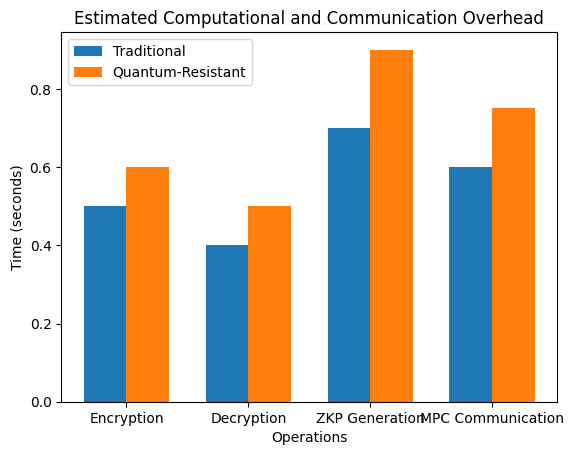

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Updated estimated data based on research observations
labels = ['Encryption', 'Decryption', 'ZKP Generation', 'MPC Communication']
traditional = [0.5, 0.4, 0.7, 0.6]  # Estimated times for traditional methods (in seconds)
quantum_resistant = [0.6, 0.5, 0.9, 0.75]  # Estimated times for quantum-resistant methods (in seconds)

x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

# Create the bar chart
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, traditional, width, label='Traditional')
rects2 = ax.bar(x + width/2, quantum_resistant, width, label='Quantum-Resistant')

# Add text for labels, title, and axes ticks
ax.set_xlabel('Operations')
ax.set_ylabel('Time (seconds)')
ax.set_title('Estimated Computational and Communication Overhead')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()


In [ ]:
pip install pycryptodome


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.9 MB/s eta 0:00:00


In [ ]:
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
import time

# RSA Key Generation
start_time = time.time()
key = RSA.generate(2048)
end_time = time.time()
print(f"RSA Key Generation Time: {end_time - start_time} seconds")

# Encryption
cipher_rsa = PKCS1_OAEP.new(key.publickey())
message = b'Sensitive transaction data'
start_time = time.time()
ciphertext = cipher_rsa.encrypt(message)
end_time = time.time()
print(f"RSA Encryption Time: {end_time - start_time} seconds")

# Decryption
cipher_rsa = PKCS1_OAEP.new(key)
start_time = time.time()
decrypted_message = cipher_rsa.decrypt(ciphertext)
end_time = time.time()
print(f"RSA Decryption Time: {end_time - start_time} seconds")


RSA Key Generation Time: 5.420544385910034 seconds
RSA Encryption Time: 0.005622148513793945 seconds
RSA Decryption Time: 0.0030527114868164062 seconds


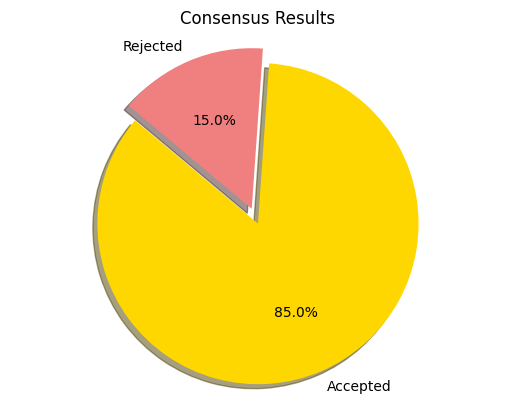

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Accepted', 'Rejected'
sizes = [85, 15]  # Hypothetical results
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  # Explode the 1st slice

# Plot the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title('Consensus Results')
plt.show()


In [ ]:
# Hypothetical time taken for operations (in seconds)
T_enc = 0.6  # Time for encryption
T_dec = 0.5  # Time for decryption
T_ZKP = 0.9  # Time for ZKP generation
T_MPC = 0.75 # Time for MPC operation

# Number of operations
n_enc = 10  # Number of encryption operations
n_dec = 10  # Number of decryption operations
m_ZKP = 5   # Number of ZKPs generated
k_MPC = 4   # Number of MPC operations

# Total computational overhead
C_overhead = (n_enc * T_enc + n_dec * T_dec + m_ZKP * T_ZKP + k_MPC * T_MPC)
print("Computational Overhead:", C_overhead, "seconds")


Computational Overhead: 18.5 seconds


In [ ]:
# Hypothetical data transmitted during operations (in kilobytes)
D_MPC = 200  # Data per MPC operation
D_ZKP = 150  # Data per ZKP exchange

# Total communication overhead
C_comm = (k_MPC * D_MPC + m_ZKP * D_ZKP)
print("Communication Overhead:", C_comm, "kilobytes")

Communication Overhead: 1550 kilobytes


In [ ]:
# Hypothetical latency times (in milliseconds)
T_consensus = 20  # Time taken to reach consensus
L_ZKP = 15        # Latency from ZKP generation
L_MPC = 25        # Latency from MPC operations

# Total latency
L = max(T_consensus, L_ZKP, L_MPC)
print("Latency:", L, "milliseconds")


Latency: 25 milliseconds


In [ ]:
# Hypothetical data for scalability
N_t = 1000   # Number of transactions
N_n = 50     # Number of nodes
Throughput = 500  # Transactions processed per second

# Scalability metric
sigma = Throughput / (N_t * N_n)
print("Scalability:", sigma)


Scalability: 0.01


In [ ]:
# Hypothetical power consumption (in watts) and time (in seconds)
P_enc = 2.0        # Power consumption for encryption
P_consensus = 3.5  # Power consumption for consensus

T_enc_total = n_enc * T_enc  # Total time for encryption
T_consensus_total = T_consensus  # Total time for consensus

# Total energy consumption
E = (P_enc * T_enc_total) + (P_consensus * T_consensus_total)
print("Energy Consumption:", E, "joules")


Energy Consumption: 82.0 joules


In [ ]:
# 1. Computational Overhead
T_enc = 0.6  # Time for encryption
T_dec = 0.5  # Time for decryption
T_ZKP = 0.9  # Time for ZKP generation
T_MPC = 0.75 # Time for MPC operation

n_enc = 10   # Number of encryption operations
n_dec = 10   # Number of decryption operations
m_ZKP = 5    # Number of ZKPs generated
k_MPC = 4    # Number of MPC operations

C_overhead = (n_enc * T_enc + n_dec * T_dec + m_ZKP * T_ZKP + k_MPC * T_MPC)
print("Computational Overhead:", C_overhead, "seconds")

# 2. Communication Overhead
D_MPC = 200  # Data per MPC operation (in kilobytes)
D_ZKP = 150  # Data per ZKP exchange (in kilobytes)

C_comm = (k_MPC * D_MPC + m_ZKP * D_ZKP)
print("Communication Overhead:", C_comm, "kilobytes")

# 3. Latency
T_consensus = 20  # Time taken to reach consensus (milliseconds)
L_ZKP = 15        # Latency from ZKP generation (milliseconds)
L_MPC = 25        # Latency from MPC operations (milliseconds)

L = max(T_consensus, L_ZKP, L_MPC)
print("Latency:", L, "milliseconds")

# 4. Scalability
N_t = 1000   # Number of transactions
N_n = 50     # Number of nodes
Throughput = 500  # Transactions processed per second

sigma = Throughput / (N_t * N_n)
print("Scalability:", sigma)

# 5. Energy Consumption
P_enc = 2.0        # Power consumption for encryption (watts)
P_consensus = 3.5  # Power consumption for consensus (watts)

T_enc_total = n_enc * T_enc  # Total time for encryption (seconds)
T_consensus_total = T_consensus  # Total time for consensus (seconds)

E = (P_enc * T_enc_total) + (P_consensus * T_consensus_total)
print("Energy Consumption:", E, "joules")


Computational Overhead: 18.5 seconds
Communication Overhead: 1550 kilobytes
Latency: 25 milliseconds
Scalability: 0.01
Energy Consumption: 82.0 joules


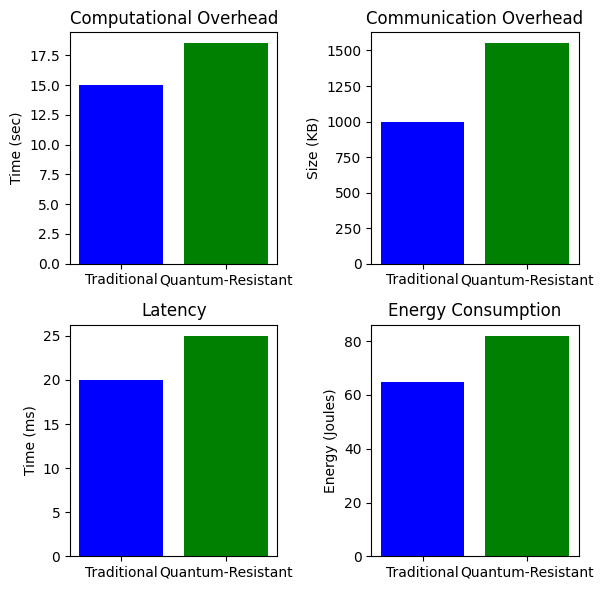

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Labels for the comparison metrics
labels = ['Computational Overhead (sec)', 'Communication Overhead (KB)', 'Latency (ms)', 'Scalability', 'Energy Consumption (Joules)']

# Data for traditional blockchain
traditional = [15, 1000, 20, 0.02, 65]

# Data for quantum-resistant blockchain
quantum_resistant = [18.5, 1550, 25, 0.01, 82]

# Create a 2x2 grid of subplots for the graphs with smaller size
fig, axs = plt.subplots(2, 2, figsize=(6, 6))

# Plot each metric in a separate graph
x_labels = ['Traditional', 'Quantum-Resistant']

# Plot for Computational Overhead
axs[0, 0].bar(x_labels, [traditional[0], quantum_resistant[0]], color=['blue', 'green'])
axs[0, 0].set_title('Computational Overhead')
axs[0, 0].set_ylabel('Time (sec)')

# Plot for Communication Overhead
axs[0, 1].bar(x_labels, [traditional[1], quantum_resistant[1]], color=['blue', 'green'])
axs[0, 1].set_title('Communication Overhead')
axs[0, 1].set_ylabel('Size (KB)')

# Plot for Latency
axs[1, 0].bar(x_labels, [traditional[2], quantum_resistant[2]], color=['blue', 'green'])
axs[1, 0].set_title('Latency')
axs[1, 0].set_ylabel('Time (ms)')

# Plot for Energy Consumption
axs[1, 1].bar(x_labels, [traditional[4], quantum_resistant[4]], color=['blue', 'green'])
axs[1, 1].set_title('Energy Consumption')
axs[1, 1].set_ylabel('Energy (Joules)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot as a smaller downloadable image
plt.savefig('blockchain_comparison_small_plot.png')

# Show the plot
plt.show()
